In [1]:
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

### Split dataset - training/test

In [2]:
def split_dataset(data, r): # split a dataset
	N = len(data)
	X = []
	Y = []
	
	if r >= 1: 
		print ("Parameter r needs to be smaller than 1!")
		return
	elif r <= 0:
		print ("Parameter r needs to be larger than 0!")
		return

	n = int(round(N*r)) # number of elements in testing sample
	nt = N - n # number of elements in training sample
	ind = -np.ones(n,int) # indexes for testing sample
	R = np.random.randint(N) # some random index from the whole dataset
	
	for i in range(n):
		while R in ind: R = np.random.randint(N) # ensure that the random index hasn't been used before
		ind[i] = R

	ind_ = list(set(range(N)).difference(ind)) # remaining indexes	
	X = data[ind_,:-1] # training features
	XX = data[ind,:-1] # testing features
	Y = data[ind_,-1] # training targets
	YY = data[ind,-1] # testing targests
	return X, XX, Y, YY

In [3]:
r = 0.2 # ratio of test data over all data (this can be changed to any number between 0.0 and 1.0 (not inclusive)
dataset = np.genfromtxt('InternetAd_Dataset.csv', delimiter=",", skip_header=1)
X, XX, Y, YY = split_dataset(dataset, r)

### Train model

In [4]:
""" CLASSIFICATION MODELS """
# Logistic regression classifier
C_parameter = 50. / len(X) # parameter for regularization of the model
class_parameter = 'ovr' # parameter for dealing with multiple classes
penalty_parameter = 'l1' # parameter for the optimizer (solver) in the function
solver_parameter = 'saga' # optimization system used
tolerance_parameter = 0.1 # termination parameter

In [5]:
#Training the LR Model
clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(X, Y) 
print ('coefficients:')
print (clf.coef_) # each row of this matrix corresponds to each one of the classes of the dataset
print ('intercept:')
print (clf.intercept_) # each element of this vector corresponds to each one of the classes of the dataset

# Apply the Model
print ('predictions for test set:')
print (clf.predict(XX))
print ('actual class values:')
print (YY)

coefficients:
[[0.        0.8789862 0.        ... 0.        0.        0.       ]]
intercept:
[-2.34622463]
predictions for test set:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 

### Assess model

In [6]:
Y = (clf.predict(XX))
T = (YY)

In [7]:
# Confusion Matrix
CM = confusion_matrix(T, Y)
print ("\n\nConfusion matrix:\n", CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(T, Y)
print ("\nAccuracy rate:", AR)
ER = 1.0 - AR
print ("\nError rate:", ER)
P = precision_score(T, Y)
print ("\nPrecision:", np.round(P, 2))
R = recall_score(T, Y)
print ("\nRecall:", np.round(R, 2))
F1 = f1_score(T, Y)
print ("\nF1 score:", np.round(F1, 2))



Confusion matrix:
 [[539   9]
 [ 48  60]]

TP, TN, FP, FN: 60 , 539 , 9 , 48

Accuracy rate: 0.913109756097561

Error rate: 0.08689024390243905

Precision: 0.87

Recall: 0.56

F1 score: 0.68


In [8]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'green' # Line Color

In [9]:
preds = clf.predict_proba(XX)[:,1]
fpr, tpr, th = roc_curve(T, preds) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))


TP rates: [0.01 0.02 0.06 0.11 0.14 0.19 0.25 0.27 0.29 0.3  0.3  0.3  0.32 0.36
 0.37 0.37 0.42 0.45 0.51 0.51 0.54 0.56 0.56 0.58 0.61 0.61 0.63 0.63
 0.64 0.65 0.65 0.66 0.66 0.67 0.7  0.7  0.73 0.73 0.73 0.73 0.73 0.75
 0.76 0.76 0.77 0.77 0.79 0.79 0.8  0.8  0.8  0.8  0.8  0.81 0.81 0.81
 0.82 0.82 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.83
 0.83 0.83 0.83 0.83 0.83 0.83 0.83 0.84 0.84 0.84 0.85 0.85 0.85 0.85
 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.87 0.88 0.88 0.88 0.88 0.88 0.88
 0.88 0.88 0.88 0.88 0.91 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.98 0.98 0.98 0.98 0.98 0.98 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]

FP rates: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 

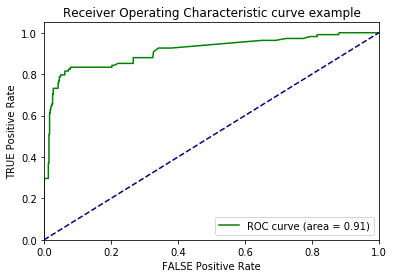

In [10]:
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

In [11]:
print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, preds), 2), "\n")


AUC score (using auc function): 0.91

AUC score (using roc_auc_score function): 0.91 

